In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)

# read from link
import zipfile
from urllib.request import urlopen
from io import BytesIO

## Analysis from Zoning Application Portal

Objective: Find wider narrative as told by big data

In [9]:
resp = urlopen("https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/zapprojects_20220831csv.zip")
myzip = zipfile.ZipFile(BytesIO(resp.read()))

In [10]:
# from ZAP
df = pd.read_csv(myzip.open('zap_projects.csv'))

In [53]:
df.head()

,project_id,project_name,project_brief,project_status,public_status,ulurp_non,actions,ulurp_numbers,ceqr_type,ceqr_number,eas_eis,ceqr_leadagency,primary_applicant,applicant_type,borough,community_district,cc_district,flood_zone_a,flood_zone_shadedx,current_milestone,current_milestone_date,current_envmilestone,current_envmilestone_date,app_filed_date,noticed_date,certified_referred,approval_date,completed_date,mih_flag,mih_option1,mih_option2,mih_workforce,mih_deepaffordability,mih_mapped_no_res
0,P2005R0355,30 ST JAMES AVE,AUTH FOR DEVELOPMENT ON A STEEP SLOPE & REMOVA...,Complete,Completed,Non-ULURP,NaN,NaN,NaN,NaN,NaN,NaN,ROBERT PENNACHIO/VALENTINO ASSOC,Private,Staten Island,R02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-01,NaN,2006-05-23,NaN,NaN,NaN,NaN,NaN,NaN
1,P2015R0395,Acacia Avenue - Wood Duck Pond - Bluebelt,This is a public application by NYC Department...,Complete,Completed,Non-ULURP,NaN,NaN,Type I,01DEP004R,NaN,DEP,DEP - Department of Environmental Protection (...,Other Public Agency,Staten Island,R03,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-02,NaN,2016-08-03,NaN,NaN,NaN,NaN,NaN,NaN
2,P2005R0358,PENDALE ST DEMAP,05DCP083R: PENDALE STREET DEMAPPING,Withdrawn-Other,Completed,ULURP,NaN,NaN,NaN,05DCP083R,NaN,DCP,METROPOLITAN NY SYNOD. OF THE EVANGELICAL CHURCH,Private,Staten Island,R03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-09-25,NaN,2007-02-09,NaN,NaN,NaN,NaN,NaN,NaN
3,P2005X0165,MELROSE COMMONS CORNERSTONE,88-087X: DEV. OF UP TO 5000 NEW HOUSING UNITS ...,Complete,Completed,ULURP,NaN,NaN,NaN,88-087X,NaN,NaN,HPD,Other Public Agency,Bronx,"X01,X03",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-12-20,NaN,2005-05-31,NaN,NaN,NaN,NaN,NaN,NaN
4,P2005R0360,145 SPRAGUE AVE,CERT SCHOOL SEATS TO BUILD A 1-FAMILY HOME IN ...,Complete,Completed,Non-ULURP,NaN,NaN,NaN,NaN,NaN,NaN,MICHAEL RUSSO/STEVEN SAVINO,Private,Staten Island,R03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-07-06,NaN,2005-07-06,NaN,NaN,NaN,NaN,NaN,NaN


Potential other numeric values from ZAP dataset

Count of projects in application per CB? 

Limitations: no lat and long...will need to geocode.

In [66]:
df.actions.isna().sum()/len(df)

0.974619919329817

In [64]:
df.actions.value_counts()

RC            103
ZC             90
ZM; ZR         80
PX             75
HK             65
             ... 
HA; PQ          1
ZM; ZS; LD      1
MM; PQ          1
PP; PQ          1
HD; HU          1
Name: actions, Length: 136, dtype: int64

In [77]:
mih_cols = ['mih_flag', 'mih_option1', 'mih_option2', 'mih_workforce', 'mih_deepaffordability', 'mih_mapped_no_res']

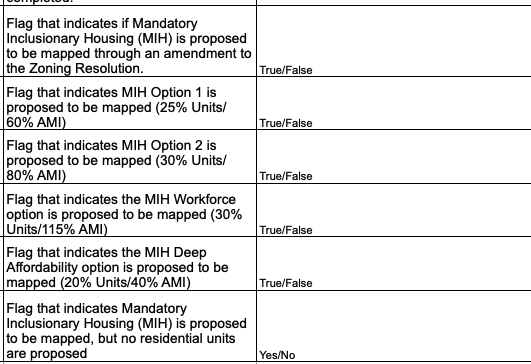

Could map on translucent paper where the MIH is proposed, or with pushpin? We would geocode using the project_name

In [78]:
# mih_flag is not mutually exclusive? 
df[(df['mih_flag']==False)][mih_cols].sum()

mih_flag                 0
mih_option1              5
mih_option2              1
mih_workforce            0
mih_deepaffordability    1
dtype: object

In [80]:
# this is what we would geocode
df[(df[mih_cols].any(1))].shape

(331, 34)

In [82]:
mih_only = df[(df[mih_cols].any(1))]

In [83]:
mih_only.shape

(331, 34)

In [81]:
df[(df[mih_cols].any(1))].project_name.value_counts()

30-11 12th Street Rezoning        2
40-25 Crescent Street Rezoning    1
895 Bedford Avenue Rezoning       1
737 Fourth Avenue                 1
Bushwick Neighborhood Plan        1
                                 ..
Bedford-Union Armory (LSGD)       1
Lexington Gardens II              1
Sutter Avenue Rezoning            1
307 Kent Avenue Rezoning          1
217 W57 Subway Stair              1
Name: project_name, Length: 330, dtype: int64

In [71]:
df[mih_cols].sum()

mih_flag                 233
mih_option1              196
mih_option2              116
mih_workforce              9
mih_deepaffordability     98
dtype: object

In [63]:
df[mih_cols].value_counts()

mih_flag  mih_option1  mih_option2  mih_workforce  mih_deepaffordability  mih_mapped_no_res
False     False        False        False          False                  No                   10
True      True         True         False          False                  No                    6
                                                                          Yes                   4
                       False        False          False                  No                    3
          False        False        False          False                  Yes                   2
          True         False        False          True                   No                    2
False     False        False        False          False                  Yes                   1
          True         True         False          False                  No                    1
True      True         False        False          False                  Yes                   1
                          

In [58]:
df.mih_deepaffordability.value_counts()

False    760
True      98
Name: mih_deepaffordability, dtype: int64

In [69]:
df[(df['community_district'].str.contains('M04')) & (df['mih_flag'] ==True) ]['project_brief'].value_counts()

Zoning map amendment, zoning text amendment (MIH), and special permit pursuant to Special Hudson River Park District to facilitate 740,615 sf of mixed use development at 601 West 29th Street within an M2-3 district.                                                                                                                                                                                                                                                                                     1
A zoning text amendment (ZR), zoning map amendment (ZM), and site selection and acquisition (PC) - to facilitate a new, 581,601 sf mixed-use development with affordable and supportive housing, hotel and office use, retail, and NYPD vehicle storage - are being sought by EDC and 495 11 Avenue Owner Realty LLC (for ZR and ZM actions) and the Department of Citywide Administrative Services and NYPD (for PC action) at 495 11th Ave in Clinton/Hell’s Kitchen, Community District 4, Manhattan.    1
Zoning text 

Can we look into portion of units that go to median income?

How much affordability is there?

What are the average rental price for the area? Overlay on the map? 

Transparent boundaries to layer on top of the map. 

Photos in addition to show the patterns

Do we want to show things changing over time? Tangible places people go to? What was the actual thing that people said about the neighborhood?

Macro lens tied together with the tangible places.

Story telling about historical development?

For each area can we see the historical story line? 

### Potential analysis:

- NLP on the project brief, see what nouns come up

- Map to the community district


Challenges: hard to really see what the big rezoning stories are?

If we search for rezoning, which proper nouns come up

In [27]:
# span of data is comprehensive?
df[df.certified_referred.notna()].certified_referred.min(), df[df.certified_referred.notna()].certified_referred.max()

('1970-04-21', '2022-09-06')

In [ ]:
# todo visualize as time series to identify gaps

In [24]:
df.borough.value_counts()

Manhattan        11434
Staten Island     8225
Brooklyn          4874
Queens            3568
Bronx             3142
Citywide           987
Name: borough, dtype: int64

In [12]:
df.shape

(32230, 34)

In [36]:
df[df.community_district == "CY00"].head(20)

,project_id,project_name,project_brief,project_status,public_status,ulurp_non,actions,ulurp_numbers,ceqr_type,ceqr_number,eas_eis,ceqr_leadagency,primary_applicant,applicant_type,borough,community_district,cc_district,flood_zone_a,flood_zone_shadedx,current_milestone,current_milestone_date,current_envmilestone,current_envmilestone_date,app_filed_date,noticed_date,certified_referred,approval_date,completed_date,mih_flag,mih_option1,mih_option2,mih_workforce,mih_deepaffordability,mih_mapped_no_res
2887,P2017Y0302,M1 Hotel Special Permit,The NYC Department of City Planning is proposi...,Complete,Completed,Non-ULURP,NaN,NaN,Type I,18DCP042Y,EIS,DCP,DCP,DCP,Citywide,CY00,NaN,False,False,EIS - Project Completed,2018-12-26,EIS - DEIS Public Hearing Held,2018-07-25,NaN,NaN,2018-04-23,NaN,2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN
3559,2021Y0291,Open Restaurants / Sidewalk Cafes,The New York City Department of Transportation...,Complete,Completed,Non-ULURP,ZR,N210434ZRY,Type I,21DOT016Y,EAS,DOT,DCP - Department of City Planning (NYC),DCP,Citywide,CY00,NaN,False,False,EAS - Project Completed,2022-03-02,NaN,NaN,NaN,NaN,2021-06-21,2022-02-24,NaN,False,False,False,False,False,NaN
3642,2021Y0334,Health and Fitness Citywide Text Amendment,Proposal to amend the Zoning Resolution to mod...,Complete,Completed,Non-ULURP,ZR,NaN,Type I,21DCP183Y,EAS,DCP,DCP - Department of City Planning (NYC),DCP,Citywide,CY00,NaN,False,False,EAS - Project Completed,2021-12-21,EAS - Review Filed EAS,2021-05-14,2021-05-14,NaN,2021-05-19,2021-12-09,NaN,False,False,False,False,False,NaN
12582,P2017Y0045,Zoning for Coastal Flood Resiliency,A citywide text amendment to update and make p...,Complete,Completed,Non-ULURP,NaN,NaN,Type I,19DCP192Y,EIS,DCP,DCP - Department of City Planning (NYC),DCP,Citywide,CY00,NaN,True,True,Study - Project Completed,2021-05-26,EIS - Prepare and Review FEIS,2021-02-03,NaN,NaN,2020-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17949,2020Y0203,Citywide Hotels Text Amendment,A Zoning Text Amendment to require a citywide ...,Complete,Completed,Non-ULURP,ZR,N210406ZRY,Type I,21DCP111Y,EIS,DCP,DCP - Department of City Planning (NYC),DCP,Citywide,CY00,NaN,False,False,Study - Project Completed,2021-12-21,EIS - Prepare and Review FEIS,2021-07-30,2021-04-16,NaN,2021-05-03,2021-12-09,NaN,False,False,False,False,False,NaN
17983,2020Y0194,Elevate Transit: Zoning for Accessibility (ZFA),The MTA and DCP are proposing a citywide zonin...,Complete,Completed,Non-ULURP,ZR,N210270ZRY,Type I,21DCP136Y,EAS,DCP,MTA - NYS Metro Transit Authority,Other Public Agency,Citywide,CY00,NaN,False,False,EAS - Project Completed,2021-10-19,NaN,NaN,NaN,NaN,2021-04-05,2021-10-07,NaN,False,False,False,False,False,NaN
18154,2020Y0211,FRESH Update,A citywide text amendment to expand the FRESH ...,Complete,Completed,Non-ULURP,ZR,N210380ZRY,Type I,21DCP182Y,EAS,DCP,DCP - Department of City Planning (NYC),DCP,Citywide,CY00,NaN,False,False,Study - Project Completed,2021-12-21,EAS - Review Filed EAS,2021-05-14,2021-05-13,NaN,2021-05-19,2021-12-15,NaN,False,False,False,False,False,NaN
30175,P2002Y0406,WATER TAXI TEXT AMENDMENT,02DCP051Y: CHANGES TO SECTIONS 32-15 AND 32-23...,Complete,Completed,NaN,NaN,NaN,NaN,02DCP051Y,NaN,DCP,NYC-DCP,DCP,Citywide,CY00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# assume this is CB
df.community_district.value_counts()

R03                                                                                                    6028
M02                                                                                                    1895
M08                                                                                                    1497
M07                                                                                                    1368
M05                                                                                                    1361
                                                                                                       ... 
Q03,Q04,Q06,Q07,Q08,Q11                                                                                   1
K10,K12                                                                                                   1
K01,K02,K05,K06,K07,K10,K12,K14,K16,K17,X01,X04,X05,X07,M11,Q01,Q02,Q03,Q04,Q06,Q08,Q09,Q10,Q12,R00       1
K09,X04                     

In [31]:
df.community_district.unique()

array(['R02', 'R03', 'X01,X03', 'X02', 'X01', 'X12', nan, 'X11', 'X04',
       'X08', 'X10', 'R02,R03', 'X08,Q07,R01,R02', 'X09', 'X06', 'K06',
       'X11,X12', 'K01', 'K07', 'R01', 'K13', 'K15', 'K14', 'K04', 'X03',
       'K16', 'K10', 'K00,X00,CY00,M00,Q00,R00', 'K02', 'K04,K16', 'X05',
       'K03', 'M02', 'M04', 'M01', 'M05', 'K00,Q00,R00', 'M12', 'K18',
       'M04,M05', 'M09', 'K05', 'K12', 'M11', 'K11', 'M10', 'M08', 'M03',
       'M06', 'M07', 'K00,X00,CY00,M00,M07,Q00,R00', 'K08', 'Q04', 'Q03',
       'Q14', 'Q07', 'Q08', 'Q05', 'Q01', 'Q02', 'Q06', 'M03,M06', 'Q11',
       'K00,X00,CY00,M00,Q00,Q11,R00', 'K00,X00,CY00,M00,Q00,Q08,R00',
       'Q13', 'R00', 'Q10', 'R01,R02,R03', 'Q12,Q13', 'Q09', 'X07',
       'K00,X00,X12,CY00,M00,Q00,R00', 'K09', 'K17,K18', 'K17',
       'K00,K03,X00,CY00,M00,Q00,R00', 'X01,X02,X04',
       'K00,X00,M00,M02,Q00', 'M01,M03', 'M05,M06', 'Q12', 'Q00',
       'Q07,Q08', 'Q08,Q12', 'K06,K08', 'K01,K03', 'X00', 'K00',
       'K06,K07', 'K03,K13'

I wonder what R03 goes to? Staten Island? That is surprising it has the top number of rezoning?

Same with X0 - Bronx?

CY?

Generally seems okay

Interesting how "Case Iron" and "artists" comes up very often from the projects scoped for the area in Soho...but not for "Noho"

In [23]:
df[df.project_brief.str.contains("Soho", case=False, na=False)].project_brief.value_counts()

95DCP048M: TO RENOVATE BLDG FOR USE AS JOINT LIVING-WORK QUARTERS FOR ARTISTS, A MUSEUM AND RETAIL SPACE WITHIN THE SOHO CAST IRON HISTORIC DIST.                                                                                                                                                                                                                                                                                                                                       2
SOHO BUSINESS IMPROVEMENT DIST                                                                                                                                                                                                                                                                                                                                                                                                                                                          1
SPECIAL PERMIT TO CONVERT P/O THE BUILDING TO JOINT 

In [28]:
df[df.project_brief.str.contains("Noho", case=False, na=False)].project_brief.value_counts()

95DCP063M: TO ALLOW A CONSOLIDATION OF EXISTING RETAIL SPACE ON A SITE LOCATED ON THE EAST SIDE OF BROADWAY BETWEEN HOUSTON STREET AND BLEECKER STREET IN THE NOHO SECTION OF MANHATTAN                                                                                                                                                                                                    4
Special Permit pursuant to ZR Section 74-711 to allow the construction of 2 single-story penthouse additions on the roof of an existing building in M1-5B district within the NoHo Historic District                                                                                                                                                                                       1
SPEC PERM (ZR74-781) TO USE P/O GROUND FLR FOR A USE NOT*PERMITTED BY ZR42-14D IN AN M1-5B BLDG IN NOHO DIST                                                                                                                                  

In [19]:
df[df.project_name.str.contains("Soho", case=False, na=False)].shape

(28, 34)

In [17]:
df[df.project_brief.str.contains("rezoning", case=False, na=False)].shape

(255, 34)

In [44]:
df[df.project_brief.str.contains("upzoning", case=False, na=False)].shape

(1, 34)

In [39]:
df[df.project_brief.str.contains("rezoning", case=False, na=False)].community_district.value_counts().head(20)

Q07    16
Q01    15
Q02    12
M04    11
K01    10
R03    10
K18     9
X09     9
R01     8
K06     8
X10     6
K12     6
M07     5
X01     5
K02     5
K08     5
Q06     5
Q08     4
Q05     4
R02     4
Name: community_district, dtype: int64

Can above be used to see what "big data" would surface?

Would need to make function to tabulate count when concatenated CD?

In [50]:
df[(df.project_brief.str.contains("housing", case=False, na=False)) & (df.community_district=='M02')].project_brief.value_counts()

87-311M: AMEND OF SPECIAL LITTLE ITALY DISTRICT (ZON RESO) SO TO ENCOURAGE RESIDENTIAL CONSTRUCTION OF MARKET RATE HOUSING TB521. TL54.                                                                                                                                                                                                                                                                                                                 3
This is an application by HPD for a disposition of city-owned property to facilitate a 123-unit affordable senior housing in Preservation Area A of the Special Little Italy District, in Nolita, Community District 2, Manhattan.                                                                                                                                                                                                                      1
88-240M: MODIFICATION TO EXISTING PIER TO ACCOMMODATE A FLOATING HOUSING FACILITY                                   

Queens rezoning?

Special Flushing Waterfront District (I don't think CB7 is on Block party - that is part of the story?)


Proposed rezoning of all or portions of 238 blocks in Astoria, Queens CD 1, to preserve the existing scale and character of the area while allowing for a modest increase in residential and commercial density in limited locations.

Lot of push for MIH in CB1, could look at "Astoria"


Proposed rezoning of all or portions of 130 blocks in Sunnyside and Woodside, Queens CD 2, to protect the lower-density character of these neighborhoods while allowing for a moderate increase in residential and commercial density along main corridors.


Hard to identify the big zoning stories from the ZAP portal, so much going on. Unless you know what to search for already...